In [83]:
pip install pandas

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: /Users/muratkaya/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install numpy

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: /Users/muratkaya/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [85]:
import pandas as pd

In [86]:
import numpy as np

In [87]:
pip install matplotlib

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: /Users/muratkaya/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [88]:
import matplotlib.pyplot as plt

In [89]:
pip install seaborn

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: /Users/muratkaya/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [90]:
import seaborn as sns

In [91]:
df_ = pd.read_csv("../datasets/MTA_Subway_Hourly_Ridership__Beginning_February_2022_20240414.csv")
df = df_.copy()

/Users/muratkaya/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [92]:
df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,03/31/2024 04:00:00 AM,subway,209,Far Rockaway-Mott Av (A),Queens,omny,OMNY - Full Fare,11,1,40.603996,-73.755400,POINT (-73.7554 40.603996)
1,03/31/2024 05:00:00 AM,subway,193,104 St (A),Queens,metrocard,Metrocard - Unlimited 30-Day,1,0,40.681710,-73.837685,POINT (-73.837685 40.68171)
2,03/31/2024 06:00:00 AM,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,metrocard,Metrocard - Seniors & Disability,4,1,40.775036,-73.912030,POINT (-73.91203 40.775036)
3,03/31/2024 08:00:00 AM,subway,108,Middle Village-Metropolitan Av (M),Queens,metrocard,Metrocard - Unlimited 7-Day,10,0,40.711395,-73.889600,POINT (-73.8896 40.711395)
4,03/31/2024 08:00:00 AM,subway,308,Cathedral Pkwy (110 St) (1),Manhattan,metrocard,Metrocard - Unlimited 30-Day,11,0,40.803967,-73.966850,POINT (-73.96685 40.803967)


In [93]:
df = df[df["transit_mode"] == "subway"]

In [94]:
df.drop(columns=["station_complex_id", "payment_method", "fare_class_category", "latitude", "longitude", "transfers", "Georeference"], axis=1, inplace=True)

In [95]:
df["transit_timestamp"] = pd.to_datetime(df["transit_timestamp"])

In [96]:
df_april_may = (df["transit_timestamp"].dt.year == 2023) & ((df["transit_timestamp"].dt.month == 4) | (df["transit_timestamp"].dt.month == 5))

df = df[df_april_may]

In [97]:
df["date"] = df["transit_timestamp"].dt.date
df["time"] = df["transit_timestamp"].dt.time
df["day_of_week"] = df["transit_timestamp"].dt.day_name()

In [98]:
desired_column_order = ["borough", "station_complex", "date", "time", "day_of_week", "ridership"]
df = df[desired_column_order]
df.head()

,borough,station_complex,date,time,day_of_week,ridership
23695615,Manhattan,215 St (1),2023-04-21,18:00:00,Friday,1
23695629,Queens,"Astoria-Ditmars Blvd (N,W)",2023-04-14,06:00:00,Friday,5
23695633,Queens,"Astoria-Ditmars Blvd (N,W)",2023-04-15,10:00:00,Saturday,19
23695637,Queens,"Astoria-Ditmars Blvd (N,W)",2023-05-27,03:00:00,Saturday,2
23695643,Queens,"Astoria-Ditmars Blvd (N,W)",2023-04-18,08:00:00,Tuesday,485


In [99]:
df.value_counts()

borough   station_complex           date        time      day_of_week  ridership
Brooklyn  Van Siclen Av (C)         2023-05-23  03:00:00  Tuesday      1            7
                                    2023-05-03  03:00:00  Wednesday    1            7
          Euclid Av (A,C)           2023-04-17  02:00:00  Monday       1            7
Queens    30 Av (N,W)               2023-04-03  03:00:00  Monday       1            7
          121 St (J,Z)              2023-05-01  03:00:00  Monday       1            7
                                                                                   ..
Brooklyn  Kosciuszko St (J)         2023-05-26  09:00:00  Friday       42           1
                                                                       159          1
                                                10:00:00  Friday       3            1
                                                                       6            1
          W 8 St-NY Aquarium (F,Q)  2023-05-01  11:00:00  M

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ridership,4257836.0,46.851776,148.472145,1.0,4.0,13.0,38.0,10309.0


In [101]:
df.isnull().sum()

borough            0
station_complex    0
date               0
time               0
day_of_week        0
ridership          0
dtype: int64

In [102]:
df.duplicated().sum()

455166

In [103]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [104]:
df.value_counts()

borough    station_complex               date        time      day_of_week  ridership
Bronx      138 St-Grand Concourse (4,5)  2023-04-01  00:00:00  Saturday     1            1
Manhattan  68 St-Hunter College (6)      2023-04-30  23:00:00  Sunday       37           1
                                                     22:00:00  Sunday       5            1
                                                                            8            1
                                                                            9            1
                                                                                        ..
Brooklyn   Flushing Av (M,J)             2023-05-24  00:00:00  Wednesday    7            1
                                                     01:00:00  Wednesday    1            1
                                                                            3            1
                                                                            4            1
Quee

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ridership,3802670.0,51.68971,156.349116,1.0,5.0,15.0,43.0,10309.0


In [106]:
#Top 5 Busiest Stations
top_5_busiest_stations = df.groupby("station_complex").agg({
    "ridership": "sum"
}).sort_values(by="ridership", ascending= False).head().reset_index()

In [107]:
top_5_busiest_stations

,station_complex,ridership
0,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",7285052
1,"Grand Central-42 St (S,4,5,6,7)",5116117
2,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",4013350
3,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",3739304
4,"Fulton St (A,C,J,Z,2,3,4,5)",3012470


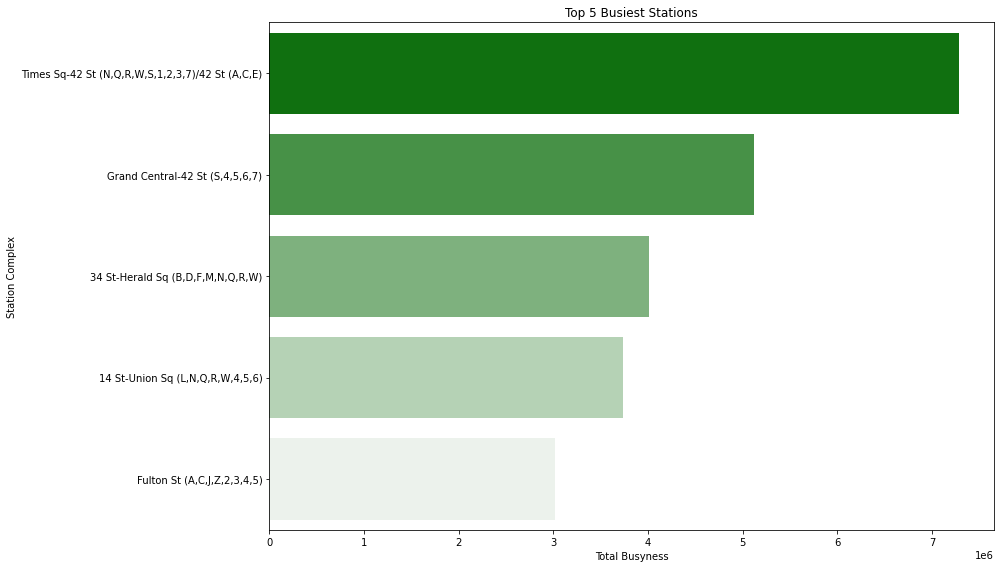

In [108]:
# Custom color palette
colors = sns.light_palette("green", n_colors=5, reverse=True)

# Create a bar plot using seaborn with the custom colormap
plt.figure(figsize=(14, 8))  # Increase the figure size to make bars more prominent
sns.barplot(x="ridership", y="station_complex", data=top_5_busiest_stations, hue="station_complex", palette=colors, dodge=False)  # Set dodge=False to not separate bars by hue

plt.xlabel('Total Busyness')
plt.ylabel('Station Complex')
plt.title('Top 5 Busiest Stations')
plt.legend().remove()  # This line removes the legend from the plot
plt.tight_layout()  # Adjust subplots to give some padding and prevent overlap
plt.show()

In [109]:
#Top 5 busiest days

top_5_busiest_days = df.groupby("day_of_week")["ridership"].sum().sort_values(ascending=False).head(7).reset_index()
top_5_busiest_days

,day_of_week,ridership
0,Wednesday,35028631
1,Tuesday,34502095
2,Thursday,30743880
3,Monday,29733111
4,Friday,28298687
5,Saturday,21127593
6,Sunday,17124912


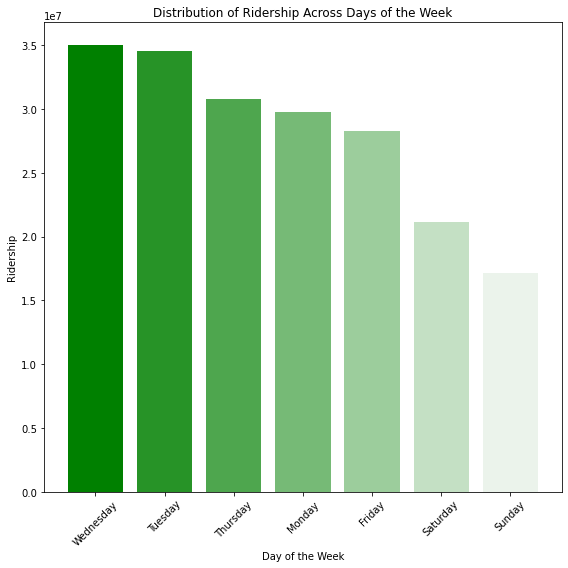

In [110]:
day_colors = sns.light_palette("green", n_colors=7, reverse=True)

plt.figure(figsize=(8,8))
plt.bar(top_5_busiest_days["day_of_week"], top_5_busiest_days["ridership"], color=day_colors)
plt.title('Distribution of Ridership Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Ridership')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [111]:
top_5_busiest_time = df.groupby("time")["ridership"].sum().sort_values(ascending=False).head().reset_index()

In [112]:
top_5_busiest_time

,time,ridership
0,17:00:00,18604585
1,16:00:00,16122755
2,08:00:00,15816351
3,18:00:00,14722561
4,15:00:00,14317235


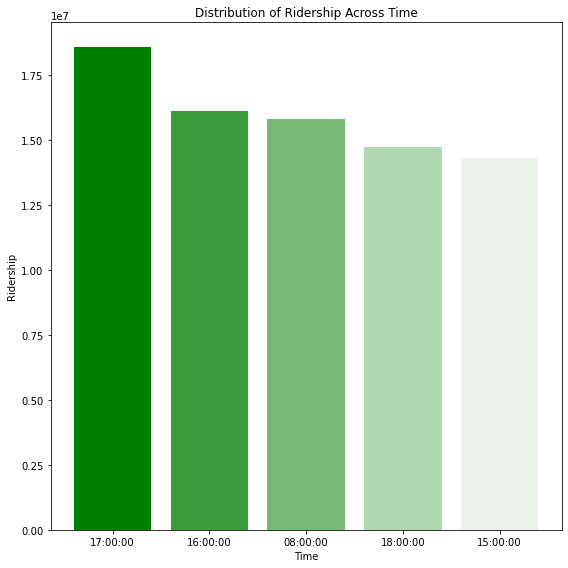

In [113]:
time_colors = sns.light_palette("green", n_colors=5, reverse=True)

plt.figure(figsize=(8,8))
plt.bar(top_5_busiest_time["time"].astype(str), top_5_busiest_time["ridership"], color=time_colors)
plt.title('Distribution of Ridership Across Time')
plt.xlabel('Time')
plt.ylabel('Ridership')
plt.tight_layout()
plt.show()

In [131]:
top_10_busiest_time_stations = df.groupby(["time","station_complex", "day_of_week", "borough"])["ridership"].sum().sort_values(ascending=False).head(500).reset_index()




In [132]:
top_10_busiest_time_stations

,time,station_complex,day_of_week,borough,ridership
0,17:00:00,"Grand Central-42 St (S,4,5,6,7)",Tuesday,Manhattan,151001
1,17:00:00,"Grand Central-42 St (S,4,5,6,7)",Wednesday,Manhattan,150556
2,17:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Wednesday,Manhattan,135295
3,17:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Tuesday,Manhattan,128950
4,17:00:00,"Grand Central-42 St (S,4,5,6,7)",Thursday,Manhattan,121861
...,...,...,...,...,...
495,17:00:00,"34 St-Penn Station (1,2,3)",Monday,Manhattan,31278
496,08:00:00,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Monday,Manhattan,31268
497,12:00:00,"Grand Central-42 St (S,4,5,6,7)",Friday,Manhattan,31248
498,18:00:00,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",Sunday,Manhattan,31216


In [135]:
weekend_riderships = top_10_busiest_time_stations[top_10_busiest_time_stations["day_of_week"] == "Saturday"] 

In [136]:
weekend_riderships

,time,station_complex,day_of_week,borough,ridership
41,22:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Saturday,Manhattan,78133
45,16:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Saturday,Manhattan,76806
70,17:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Saturday,Manhattan,67128
114,18:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Saturday,Manhattan,57587
133,15:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Saturday,Manhattan,54670
154,19:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Saturday,Manhattan,52629
172,21:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Saturday,Manhattan,50487
182,14:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Saturday,Manhattan,49235
192,20:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Saturday,Manhattan,48414
203,23:00:00,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Saturday,Manhattan,47506


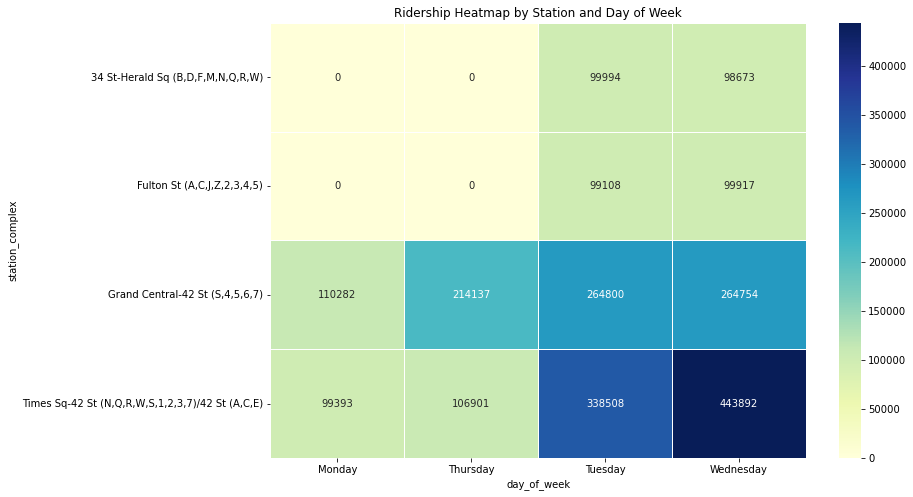

In [122]:
# Creating a pivot table
pivot_table = top_10_busiest_time_stations.pivot_table(index='station_complex', columns='day_of_week',values="ridership", aggfunc='sum', fill_value=0)

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Ridership Heatmap by Station and Day of Week')
plt.show()

In [123]:
df2 = pd.read_csv("../datasets/NYSERDA_Low-_to_Moderate-Income_New_York_State_Census_Population_Analysis_Dataset__Average_for_2013-2015_20240512.csv")

In [36]:
df2.drop(columns=["Linguistic Isolation","Income Groups","Education Level","Household Type","LMI Population Segment","Economic Development Region","Percent of Poverty Level", "Households with Elderly","Housing Unit Type","Mortgage Indicator","Non-elderly Disabled Indicator","Housing Vintage","LMI Study Region","Head of Household Age","Race / Ethnicity","Households with Children", "Owner-Renter Status","Main Heating Fuel Type","Home Energy Payment Method", "Time in Home", "Household Weight"], axis=1, inplace=True)

In [37]:
df2.columns

Index(['County / County Group', 'Low-to-Moderate Income (LMI) Group'], dtype='object')

In [38]:
df2.sample(20)

,County / County Group,Low-to-Moderate Income (LMI) Group
28967,"Otsego, Schoharie, Oneida, & Herkimer",Group 1 - Very Low Income
110487,Queens,Non-LMI Household
137640,Sullivan & Ulster,Non-LMI Household
41177,Rockland,Group 2 - Low Income
187156,Rensselaer,Non-LMI Household
84289,Nassau,Group 3 - Moderate Income
166462,Livingston & Wyoming,Non-LMI Household
167445,Westchester,Non-LMI Household
63477,Erie,Group 2 - Low Income
21727,Kings,Group 1 - Very Low Income


In [39]:
df2 = df2[df2["Low-to-Moderate Income (LMI) Group"] == "Non-LMI Household"]

In [40]:
most_repeated_value = df2['County / County Group'].value_counts().idxmax()

most_repeated_value

'Kings'

In [41]:
df3= pd.read_csv("../datasets/NYC_Women_s_Resource_Network_Database_20240512.csv")

In [42]:
df3.columns

Index(['OrganizationName', 'Brooklyn', 'Bronx', 'Manhattan', 'Queens',
       'Staten Island', 'Fax', 'Phone', 'URL', 'noURL', 'Description',
       'outsideLoc', 'outsideLocDesc', 'Aging',
       'Anti-Discrimination & Human Rights', 'Arts & Culture', 'Business',
       'Child Care & Parent Information', 'Community Service & Volunteerism',
       'Counseling & Support Groups', 'Disabilities', 'Domestic Violence',
       'Education', 'Employment & Job Training', 'Health', 'Homelessness',
       'Housing', 'Immigration', 'Legal Services',
       'Lesbian, Gay, Bisexual, and/or Transgender',
       'Personal Finance & Financial Education', 'Professional Association',
       'Veterans & Military Families', 'Victim Services', 'Women's Groups',
       'Youth Services', 'Faith-based organization', 'Foundation',
       'Is registered with the Attorney General's office',
       'New York City Agency', 'None of the above', 'Nonprofit', 'Comments',
       'Other government organization', 'Publis

In [43]:
df3_columns = ["Borough", 'OrganizationName', 'Brooklyn', 'Bronx', 'Manhattan', 'Queens',
       'Staten Island']
df3 = df3[df3_columns]

In [44]:
df3.head(20)

,Borough,OrganizationName,Brooklyn,Bronx,Manhattan,Queens,Staten Island
0,NaN,St. Mary's Hospital for Children,N,N,N,N,N
1,NaN,Greater Astoria Historical Society,N,N,N,Y,N
2,NaN,Community Resources and Services for Children,N,N,N,Y,N
3,NaN,Supportive Childrens Advocacy Network (SCAN),N,N,Y,N,N
4,NaN,Sjogren's Syndrome Foundation,N,N,Y,N,N
5,BROOKLYN,"Guardians of the Sick, Inc.",Y,N,N,N,N
6,MANHATTAN,Healthcare-NOW,N,N,Y,N,N
7,NaN,Japanese American Association of New York,Y,Y,Y,Y,Y
8,NaN,Sexuality Information & Education Council of t...,N,N,Y,N,N
9,NaN,Workers Awaaz,N,N,N,Y,N
